# RADVOR product handling in wradlib

For installing wradlib, please see https://docs.wradlib.org/en/stable/installation.html.

Handling RV and RQ is still bleeding edge (not yet released with 1.16), so after the installation procedure, you need to

`$ pip install git+https://github.com/wradlib/wradlib`

In [1]:
import wradlib
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [2]:
warnings.simplefilter('ignore', xr.SerializationWarning)

## RV product

Available via DWD opendata: https://opendata.dwd.de/weather/radar/composit/rv/

Nowcasting product at 5 minutes resolution with a max. lead time of 120 minutes. Download of a single `tar.bz2` archive contains all corresponding 25 files (0, 5, ..., 120 minutes) where 0 corresponds to the latest analysis at forecast time.

Each `tar.bz2` has to be unpacked before reading the data files. 

### Read, inspect and export one single file

In [3]:
# Read one single file
##ds = xr.open_dataset("data/DE1200_RV2210180900/DE1200_RV2210180900_005", engine="radolan")
ds = wradlib.io.radolan.open_radolan_dataset("data/DE1200_RV2210180900/DE1200_RV2210180900_000")

In [4]:
print(ds.attrs)
print("")
print(ds.RV.attrs)

{'radarid': '10000', 'formatversion': 5, 'radolanversion': 'P300001H', 'radarlocations': ['deasb', 'deboo', 'dedrs', 'deeis', 'deess', 'defbg', 'defld', 'dehnr', 'deisn', 'demem', 'deneu', 'denhb', 'depro', 'deros', 'detur', 'deumd'], 'predictiontime': 0, 'moduleflag': 8}

{'valid_min': 0, 'valid_max': 4095, 'standard_name': 'rainfall_rate', 'long_name': 'RV', 'unit': 'mm h-1'}


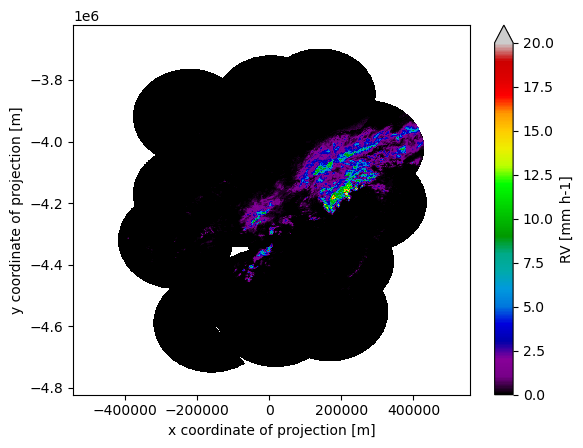

In [5]:
# Quickview
ds.RV.plot(cmap=plt.cm.nipy_spectral, vmax=20)

In [6]:
ds.RV.encoding["_FillValue"] = 65535
ds.to_netcdf("data/export/DE1200_RV2210180900_000.nc")

### Read, inspect and export one multiple files

For the RV product, it might come handy to read all files at once into a 3-D array (3rd dimension corresponds to the lead time). We can than export all lead times in one 3-D NetCDF. 

In [7]:
mds = wradlib.io.radolan.open_radolan_mfdataset("data/DE1200_RV2210180900/DE1200_RV2210180900_*", concat_dim="leadtime")

In [8]:
mds.RV.encoding["_FillValue"] = 65535
mds.to_netcdf("data/export/DE1200_RV2210180900_000-120.nc")

### Reading from tar.bz2 directly

In [9]:
import tarfile

In [10]:
tf = tarfile.open('data/DE1200_RV2210180900.tar.bz2', 'r:bz2')
fobj = tf.extractfile("DE1200_RV2210180900_000")
ds = wradlib.io.radolan.open_radolan_dataset("data/DE1200_RV2210180900/DE1200_RV2210180900_000")
tf.close()
ds.RV.encoding["_FillValue"] = 65535
ds.to_netcdf("data/export/DE1200_RV2210180900_000.nc")

## RQ product

It works just the same with the RQ product which is available here: https://opendata.dwd.de/weather/radar/radvor/rq/

RQ is a nowcast product that contains predicted rainfall for the next two hours. `.000` refers to the analysis at forecast time (rainfall depth over that last hour), `.060` refers to the rainfall depth over the next hour, `.120` over the second-next hour.

In [11]:
mds = wradlib.io.radolan.open_radolan_mfdataset("data/RQ2210180900_*", concat_dim="leadtime")

In [12]:
mds.RQ.encoding["_FillValue"] = 65535
mds.to_netcdf("data/export/RQ2210180900_000-120.nc")